In [7]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm  # progress bar
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Basic Regression Analysis

This notebook explores fundamental concepts in regression analysis, including:

1. **Synthetic Data Generation** - Creating controlled datasets for learning
2. **Model Comparison** - Comparing OLS vs Ridge Regression
3. **Cross-Validation** - Robust model evaluation techniques  
4. **Bias-Variance Trade-off** - Understanding the fundamental trade-off in machine learning

We'll use scikit-learn to implement these concepts and visualize the results.

## Import Required Libraries

Let's start by importing all the necessary libraries for our regression analysis.

# 1. Synthetic Data Generation

## Creating Controlled Datasets with `make_regression`

We'll start by generating synthetic regression data using scikit-learn's `make_regression` function. This allows us to create controlled datasets where we know the true relationships, making it perfect for learning and experimentation.

### Key Parameters Explained:

- `n_samples`: The number of samples (rows) in the dataset.
- `n_features`: The total number of features (columns) to generate.
- `n_informative`: The number of informative features, which actually contribute to the output.
- `n_targets`: The number of target variables (1 for univariate regression, more for multivariate).
- `noise`: The standard deviation of the Gaussian noise applied to the output.

### Basic Usage

Here's a simple example to generate a dataset with 100 samples, 2 features, and 1 target variable:

```python
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, n_targets=1, noise=0.1)
```

### Visualizing the Synthetic Data

It's often helpful to visualize the synthetic data to understand its structure. For 2D data, we can create a scatter plot:

```python
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y, color='blue')
plt.scatter(X[:, 1], y, color='red')
plt.xlabel('Feature values')
plt.ylabel('Target variable')
plt.title('Synthetic Data Visualization')
plt.show()
```

### Use Cases for Synthetic Data

- **Testing Algorithms**: Validate your machine learning algorithms in a controlled setting.
- **Benchmarking**: Establish performance baselines for regression tasks.
- **Educational Purposes**: Learn and teach regression techniques with clear, understandable data.

Now you try! Adjust the parameters of `make_regression` and observe how the synthetic data changes. Consider what real-world scenarios each synthetic dataset might represent.

In [ ]:
# Generate synthetic regression dataset with controlled parameters
X, y, coef = make_regression(
    n_samples=500,        # Number of data points to generate
    n_features=8,         # Total number of features (columns)
    n_informative=5,      # Number of features that actually affect the target
    noise=25,            # Standard deviation of Gaussian noise added to target
    random_state=42,     # Seed for reproducibility
    coef=True           # Return the true coefficients used to generate y
)

# Create a DataFrame for easier data manipulation
df = pd.DataFrame(X, columns=[f"x{i}" for i in range(X.shape[1])])
df["y"] = y

print("True informative coefficients (first 8 features):")
print(coef)
print(f"\nDataset shape: {df.shape}")
df.head()

True informative coefficients (first 8):
[97.246139    0.         51.80104314 61.41862443  0.          8.54030302
 48.50179875  0.        ]


,x0,x1,x2,x3,x4,x5,x6,x7,y
0,-0.483061,-0.891192,0.146793,1.612221,-0.268531,0.895038,-1.581191,0.896839,-11.518604
1,-1.840078,-1.299216,-0.032281,0.640543,-0.113128,2.511557,0.346710,0.123078,-64.071427
2,-2.189922,1.074318,1.194592,0.958386,0.229075,-0.756764,0.232787,0.051661,-74.380493
3,-0.478837,0.617006,-0.862776,0.693479,1.059936,1.097153,-2.153343,-0.392013,-174.745102
4,0.568103,-1.123494,-1.049655,1.362563,3.152057,1.447306,0.506241,1.640615,133.700454


1. **n_samples**: 
    - The number of samples (rows) in the dataset.
    - Example: `n_samples=500` creates 500 data points.

2. **n_features**: 
    - The number of features (columns) in the dataset.
    - Example: `n_features=8` creates 8 features.

3. **n_informative**: 
    - The number of informative features that contribute to the target variable (`y`).
    - Example: `n_informative=5` means 5 features are used to compute `y`.

4. **noise**: 
    - The standard deviation of the Gaussian noise added to the target variable (`y`).
    - Example: `noise=25` adds noise to make the regression problem more challenging.

5. **random_state**: 
    - Controls the randomness of the dataset generation for reproducibility.
    - Example: `random_state=42` ensures the same dataset is generated every time.

6. **coef**: 
    - If `True`, the function returns the coefficients of the informative features.
    - Example: `coef=True` returns the coefficients alongside the dataset.

#### Returns:
1. **X**: 
    - A numpy array of shape `(n_samples, n_features)` containing the feature matrix.

2. **y**: 
    - A numpy array of shape `(n_samples,)` containing the target variable.

3. **coef** (optional): 
    - A numpy array of shape `(n_features,)` containing the coefficients of the informative features (if `coef=True`).


# 2. Data Splitting and Baseline Model

## Train-Validation Split

We'll split our data into training and validation sets to properly evaluate our models. We also establish a baseline model that simply predicts the mean of the training target values.

In [ ]:
# Split the data into training and validation sets
# Use 75% for training and 25% for validation
X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns="y"),  # Features (all columns except target)
    df["y"],              # Target variable
    test_size=0.25,       # 25% for validation
    random_state=42       # Reproducible split
)

# Create a baseline model that predicts the mean of training targets
# This gives us a reference point to compare our models against
y_pred_mean = np.full_like(y_val, y_train.mean())

# Evaluate the baseline model using Mean Squared Error
mse_baseline = mean_squared_error(y_val, y_pred_mean)
print(f"Baseline MSE (predicting mean): {mse_baseline:.2f}")
print(f"Training set mean: {y_train.mean():.2f}")

Baseline MSE: 18899.50


In [ ]:
# Inspect the shapes of our datasets to understand the data structure
print("=== Data Shape Summary ===")
print(f"Original dataset:")
print(f"  Features (X): {X.shape}")
print(f"  Target (y): {y.shape}")

print(f"\nAfter train-validation split:")
print(f"  Training features (X_train): {X_train.shape}")
print(f"  Validation features (X_val): {X_val.shape}")
print(f"  Training targets (y_train): {y_train.shape}")
print(f"  Validation targets (y_val): {y_val.shape}")

print(f"\nSplit ratio: {len(X_train)/(len(X_train)+len(X_val))*100:.1f}% train, {len(X_val)/(len(X_train)+len(X_val))*100:.1f}% validation")

Shape of X before splitting: (500, 8)
Shape of y before splitting: (500,)
Shape of X_train: (375, 8)
Shape of X_val: (125, 8)
Shape of y_train: (375,)
Shape of y_val: (125,)


# 3. Ordinary Least Squares vs Ridge Regression

## Understanding Regularization

**Ordinary Least Squares (OLS)** minimizes the sum of squared residuals without any constraints on the coefficients. This can lead to overfitting, especially with many features or when features are correlated.

**Ridge Regression** adds a penalty term (L2 regularization) to the cost function:

$$\text{Cost} = \text{MSE} + \alpha \sum_{i=1}^{p} \beta_i^2$$

Where:
- $\alpha$ is the regularization strength (higher α = more shrinkage)
- $\beta_i$ are the model coefficients
- The penalty shrinks coefficients toward zero, reducing overfitting

### Key Differences:
- **OLS**: No regularization, can overfit with complex datasets
- **Ridge**: L2 regularization shrinks coefficients, improves generalization

## Building ML Pipelines

We'll create scikit-learn pipelines that combine preprocessing (feature scaling) with our regression models. Pipelines ensure that preprocessing steps are applied consistently and prevent data leakage.

In [ ]:
# Create pipelines for both OLS and Ridge regression
# Pipelines ensure preprocessing steps are applied consistently

# OLS Pipeline: StandardScaler + Linear Regression
ols = Pipeline([
    ("scaler", StandardScaler()),    # Standardize features (mean=0, std=1)
    ("lr", LinearRegression())       # Ordinary Least Squares regression
])

# Ridge Pipeline: StandardScaler + Ridge Regression  
ridge = Pipeline([
    ("scaler", StandardScaler()),           # Standardize features (important for regularization)
    ("ridge", Ridge(alpha=10.0,            # Regularization strength
                   random_state=42))       # For reproducibility
])

print("Created two pipelines:")
print("1. OLS: StandardScaler → LinearRegression")
print("2. Ridge: StandardScaler → Ridge(α=10.0)")

## Model Training

Now we'll fit both models to our training data. The pipeline will automatically apply scaling before fitting the regression model.

In [ ]:
# Fit both models to the training data
# The pipeline automatically applies scaling then fits the regression model

print("Training models...")

# Fit OLS pipeline (scaling + linear regression)
ols.fit(X_train, y_train)
print("✓ OLS model trained")

# Fit Ridge pipeline (scaling + ridge regression)  
ridge.fit(X_train, y_train)
print("✓ Ridge model trained")

print("\nBoth models are now ready for prediction and evaluation!")

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10.0, random_state=42))])

## Model Evaluation

Let's evaluate both models on training and validation sets using R² score. R² measures the proportion of variance explained by the model (1.0 = perfect fit, 0.0 = no better than predicting the mean).

In [ ]:
# Import necessary libraries
from sklearn.metrics import r2_score

# Evaluate both models on training and validation sets
print("=== Model Performance Comparison ===")

for name, model in [("OLS", ols), ("Ridge(α=10)", ridge)]:
    # Generate predictions for both training and validation sets
    y_tr_pred = model.predict(X_train)  # Training predictions
    y_va_pred = model.predict(X_val)    # Validation predictions
    
    # Calculate R² scores (coefficient of determination)
    # R² = 1 - (SS_res / SS_tot), where 1.0 is perfect fit
    train_r2 = r2_score(y_train, y_tr_pred)
    val_r2 = r2_score(y_val, y_va_pred)
    
    print(f"{name:12} → Train R²: {train_r2:.3f}  |  Val R²: {val_r2:.3f}")

print("\nNote: Large gap between train/val R² may indicate overfitting")

OLS -> Train R²: 0.967  Val R²: 0.969
Ridge(α=10) -> Train R²: 0.966  Val R²: 0.968


## Coefficient Analysis

Let's examine how Ridge regularization affects the model coefficients. Ridge regression shrinks coefficients toward zero, which can help with:
- **Multicollinearity**: When features are correlated
- **Overfitting**: When the model is too complex
- **Interpretability**: By reducing the impact of less important features

In [ ]:
# Extract and compare coefficients from both trained models
print("=== Coefficient Comparison: OLS vs Ridge ===")

# Extract coefficients from the fitted models
ols_coefs = ols.named_steps["lr"].coef_        # OLS coefficients (no regularization)
ridge_coefs = ridge.named_steps["ridge"].coef_  # Ridge coefficients (with L2 penalty)

# Create a comparison DataFrame
coef_df = pd.DataFrame({
    "feature": df.columns[:-1],     # Feature names (excluding target 'y')
    "OLS": ols_coefs,              # Original OLS coefficients  
    "Ridge": ridge_coefs,          # Shrunken Ridge coefficients
})

# Calculate shrinkage ratio: how much Ridge shrunk each coefficient
# Values close to 1.0 = minimal shrinkage, values << 1.0 = heavy shrinkage
coef_df["shrink_ratio"] = coef_df["Ridge"] / coef_df["OLS"]

# Add absolute coefficient values for easier interpretation
coef_df["abs_OLS"] = np.abs(coef_df["OLS"])
coef_df["abs_Ridge"] = np.abs(coef_df["Ridge"])

print(f"Ridge regularization (α=10.0) effects:")
print(f"Average shrinkage ratio: {coef_df['shrink_ratio'].mean():.3f}")

# Display the comparison
coef_df.round(4)

,feature,OLS,Ridge,shrink_ratio
0,x0,93.693455,91.390769,0.975423
1,x1,0.343930,0.337929,0.982550
2,x2,55.610660,54.040174,0.971759
3,x3,56.526101,55.036903,0.973655
4,x4,-0.187511,-0.265839,1.417726
5,x5,8.884185,8.618396,0.970083
6,x6,47.268233,45.839381,0.969771
7,x7,0.198086,0.171320,0.864876


### Shrink Ratio
The `shrink_ratio` represents the relative magnitude of Ridge regression coefficients compared to Ordinary Least Squares (OLS) coefficients. It is calculated as the ratio of Ridge coefficients to OLS coefficients for each feature. Values closer to 1 indicate minimal shrinkage, while values significantly less than 1 indicate substantial shrinkage.

### Difference in Coefficients
The coefficients differ between Ridge regression and OLS because Ridge regression applies regularization to penalize large coefficients. This helps reduce overfitting by shrinking the coefficients, especially for less informative features. In contrast, OLS minimizes the residual sum of squares without any penalty, which can lead to larger coefficients and potential overfitting in high-dimensional or noisy datasets.
```

# Cross Validation

## 4. Cross-Validation for Robust Evaluation

### K-Fold Cross-Validation

Cross-validation provides a more robust estimate of model performance by:
- **Training and testing on multiple data splits**
- **Reducing dependence on a single train/test split**
- **Providing confidence intervals for performance estimates**

We'll use 5-fold cross-validation, which:
1. Splits data into 5 equal parts
2. Trains on 4 parts, tests on 1 part
3. Repeats 5 times with different test parts
4. Averages the results

In [ ]:
# Perform 5-fold cross-validation on Ridge regression
print("=== 5-Fold Cross-Validation Results ===")

# Create KFold cross-validator
# - n_splits=5: Split data into 5 folds
# - shuffle=True: Randomly shuffle data before splitting  
# - random_state=42: Reproducible shuffling
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using Ridge pipeline
# - scoring="neg_root_mean_squared_error": Use RMSE as evaluation metric
# - Returns negative RMSE (scikit-learn convention for maximization)
scores = cross_val_score(
    ridge,                              # Our Ridge pipeline
    df.drop(columns="y"),              # All features
    df["y"],                           # Target variable
    cv=cv,                             # Cross-validation strategy
    scoring="neg_root_mean_squared_error"  # Evaluation metric
)

# Display results
print("Ridge 5-fold RMSE scores (negative):", scores.round(2))
print(f"Average RMSE: {-scores.mean():.2f} ± {scores.std():.2f}")
print(f"Score range: [{-scores.max():.2f}, {-scores.min():.2f}]")

# Convert back to positive RMSE for interpretation
rmse_scores = -scores
print(f"\nInterpretation: Ridge achieves {rmse_scores.mean():.1f} RMSE on average")
print(f"with ±{rmse_scores.std():.1f} standard deviation across folds")

Ridge 5-fold RMSE (neg): [-24.1106539  -24.1278872  -25.47590401 -25.91989203 -24.64738559]
Avg RMSE: 24.856344545810504


# 5. Hyperparameter Tuning

## Finding the Optimal Regularization Strength

The regularization parameter α (alpha) controls the strength of Ridge penalty:
- **α = 0**: No regularization (equivalent to OLS)
- **Low α**: Light regularization, coefficients shrunk slightly
- **High α**: Heavy regularization, coefficients shrunk heavily toward zero

We'll test different α values to find the optimal balance between bias and variance.

In [ ]:
# Test different regularization strengths (alpha values)
print("=== Ridge Regularization Strength Analysis ===")

# Define range of alpha values to test (exponential scale)
alphas = [0.01, 0.1, 1, 10, 100]

# Store results for comparison
results = []

print("Testing alpha values:", alphas)
print("\nResults:")
print("Alpha    | Val RMSE | Small Coefs")
print("-" * 35)

# Test each alpha value
for a in alphas:
    # Create Ridge pipeline with current alpha
    model = Pipeline([
        ("scaler", StandardScaler()),    # Feature standardization
        ("ridge", Ridge(alpha=a,         # Current regularization strength
                       random_state=42)) # Reproducibility
    ])
    
    # Fit model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Calculate validation RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Count coefficients that are effectively zero (|coef| < 0.05)
    # This indicates which features the model considers unimportant
    small_coefs = np.sum(np.abs(model.named_steps["ridge"].coef_) < 0.05)
    
    # Store and display results
    results.append((a, rmse, small_coefs))
    print(f"{a:8.2f} | {rmse:8.2f} | {small_coefs:11d}")

print(f"\nNote: 'Small Coefs' = coefficients with |value| < 0.05")
print(f"Higher alpha → more coefficients shrunk to ~zero → simpler model")


[(0.01, 583.0384687248131, np.int64(0)),
 (0.1, 583.023302692989, np.int64(0)),
 (1, 582.9914859369653, np.int64(0)),
 (10, 594.0287627299925, np.int64(0)),
 (100, 1400.5598324292644, np.int64(1))]

# Bias–Variance Simulation Lab
Understand how model complexity affects bias, variance, and overall test error.

# 6. Bias-Variance Trade-off Simulation

## Understanding the Fundamental Trade-off in Machine Learning

The **bias-variance decomposition** is one of the most important concepts in machine learning. It breaks down the expected prediction error into three components:

$$\text{Expected Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Noise}$$

### Key Concepts:

- **Bias²**: Error from overly simplistic assumptions (underfitting)
- **Variance**: Error from sensitivity to small fluctuations in training data (overfitting)  
- **Irreducible Noise**: Inherent randomness in the data that no model can eliminate

### The Trade-off:
- **Simple models**: High bias, low variance
- **Complex models**: Low bias, high variance
- **Optimal complexity**: Minimizes total error (bias² + variance)


In [ ]:
# Configure plotting and random seed for simulation
plt.rcParams["figure.dpi"] = 110  # Higher resolution plots
np.random.seed(42)                # Reproducible random numbers

print("Simulation setup complete!")
print("- Figure DPI: 110 (high resolution)")  
print("- Random seed: 42 (reproducible)")

### Experiment Setup
We’ll sample data from a known cubic function with Gaussian noise, train polynomial
models of varying degree on many resampled datasets, and decompose the expected error
into *bias² + variance + irreducible noise*.


In [ ]:
# Cell 2 – True Function & Helper (Code)
# Define the true underlying function and data generation helper

def f_true(x: np.ndarray) -> np.ndarray:
    """
    Ground-truth cubic relationship that we're trying to learn.
    
    This represents the "true" function that generates our target values,
    before noise is added. In real-world scenarios, we don't know this function.
    
    Args:
        x: Input features (1D array)
    Returns:
        True target values following cubic relationship
    """
    return 1.5 * x**3 - 2 * x**2 + 0.5 * x + 3

def sample_dataset(n=150, x_range=(-2, 2), noise_std=8.0):
    """
    Generate a random dataset from our true function with added noise.
    
    This simulates the real-world process where:
    1. There's an underlying relationship (f_true)
    2. We only observe noisy samples of this relationship
    3. We have limited data points
    
    Args:
        n: Number of data points to generate
        x_range: Range of x values to sample from  
        noise_std: Standard deviation of Gaussian noise to add
    Returns:
        X: Feature matrix (n, 1)
        y: Target vector (n,) with added noise
    """
    # Sample random x values uniformly from the specified range
    X = np.random.uniform(*x_range, size=n).reshape(-1, 1)
    
    # Generate true targets and add Gaussian noise
    y = f_true(X) + np.random.normal(0, noise_std, size=X.shape)
    
    return X, y.ravel()

print("✓ True function: f(x) = 1.5x³ - 2x² + 0.5x + 3")
print("✓ Data generator ready (with configurable noise)")


### Hyper-parameters
* **degrees**: polynomial degrees to test  
* **n_datasets**: number of bootstrap resamples for Monte-Carlo estimation  
* **n_points_eval**: dense grid for bias-variance evaluation


In [ ]:
# Cell 3 – Parameters (Code)
# Simulation parameters for bias-variance analysis
print("=== Bias-Variance Simulation Parameters ===")

# Polynomial degrees to test (model complexity)
degrees = range(1, 11)  # From linear (1) to very high-order (10)
print(f"Polynomial degrees to test: {list(degrees)}")

# Number of different datasets to generate (Monte Carlo estimation)
n_datasets = 50  # Each degree tested on 50 different random datasets
print(f"Datasets per degree: {n_datasets}")

# Dense evaluation grid for bias-variance computation
n_points_eval = 200  # High resolution for smooth curves
print(f"Evaluation points: {n_points_eval}")

# Create evaluation grid: dense, evenly-spaced points in our domain
x_eval = np.linspace(-2, 2, n_points_eval).reshape(-1, 1)
y_true = f_true(x_eval)  # True function values (no noise)

print(f"\nEvaluation grid: {n_points_eval} points from -2 to 2")
print(f"True function range: [{y_true.min():.1f}, {y_true.max():.1f}]")
print("\nReady for bias-variance decomposition experiment!")


### Core Loop
For each degree **d**:
1. Generate *n_datasets* independent training sets.  
2. Fit an **OLS** model (LinearRegression with PolynomialFeatures).  
3. Store predictions on **train**, **test**, and **evaluation grid**.  
4. Compute average *train* MSE, *test* MSE, **bias²**, and **variance**.


In [ ]:
# Cell 4 – Simulation (Code)
# Core bias-variance decomposition simulation
print("=== Running Bias-Variance Decomposition Simulation ===")
print("This may take a moment...")

results = []

# Test each polynomial degree (model complexity)
for d in tqdm(degrees, desc="Polynomial degrees"):
    # Storage for this degree's results across all datasets
    train_mse_list = []
    test_mse_list = []
    preds_eval = []  # Will be shape (n_datasets, n_points_eval)

    # Generate multiple datasets and train models (Monte Carlo simulation)
    for dataset_idx in range(n_datasets):
        # Generate fresh training and test sets for this iteration
        X_train, y_train = sample_dataset()  # Random training data
        X_test, y_test = sample_dataset()    # Independent test data
        
        # Create polynomial features of degree d
        poly = PolynomialFeatures(d, include_bias=False)
        
        # Transform datasets to polynomial feature space
        X_train_poly = poly.fit_transform(X_train)   # Fit transform on training
        X_test_poly = poly.transform(X_test)         # Transform test (no refit)
        X_eval_poly = poly.transform(x_eval)         # Transform evaluation grid
        
        # Fit linear regression on polynomial features
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Record performance metrics
        train_pred = model.predict(X_train_poly)
        test_pred = model.predict(X_test_poly)
        eval_pred = model.predict(X_eval_poly)
        
        train_mse_list.append(mean_squared_error(y_train, train_pred))
        test_mse_list.append(mean_squared_error(y_test, test_pred))
        preds_eval.append(eval_pred)
    
    # Convert predictions to array: (n_datasets, n_points_eval)
    preds_eval = np.vstack(preds_eval)
    
    # Compute bias-variance decomposition components
    avg_pred = preds_eval.mean(axis=0)  # Average prediction across datasets
    
    # Bias²: How far average prediction is from true function
    bias_squared = np.mean((avg_pred - y_true.ravel()) ** 2)
    
    # Variance: How much predictions vary across different datasets  
    variance = np.mean(np.var(preds_eval, axis=0))
    
    # Store results for this degree
    results.append({
        "degree": d,
        "train_mse": np.mean(train_mse_list),    # Average training error
        "test_mse": np.mean(test_mse_list),      # Average test error  
        "bias_sq": bias_squared,                 # Bias² component
        "variance": variance,                    # Variance component
    })

# Convert to DataFrame for easy analysis
df_res = pd.DataFrame(results)

print(f"\n✓ Simulation complete!")
print(f"✓ Tested {len(degrees)} polynomial degrees")
print(f"✓ {n_datasets} datasets per degree") 
print(f"✓ {len(degrees) * n_datasets} total model fits")

# Display results
df_res.round(3)


Degrees:   0%|          | 0/10 [00:00<?, ?it/s]

,degree,train_mse,test_mse,bias_sq,variance
0,1,71.925438,72.821925,9.209194,0.926494
1,2,66.482314,68.697716,3.451342,1.208399
2,3,64.220215,65.445540,0.033084,1.826145
3,4,60.305982,67.437506,0.024494,2.542374
4,5,61.049089,67.219901,0.058208,2.630784
5,6,61.128275,64.648842,0.052057,3.306675
6,7,61.123606,67.833662,0.021546,4.413894
7,8,61.011175,70.199161,0.020358,5.133469
8,9,59.826582,67.458271,0.042286,4.113258
9,10,58.518074,69.831191,0.204275,6.586995


### Plot 1 – Train vs Test Error
Visualize how error evolves with complexity.



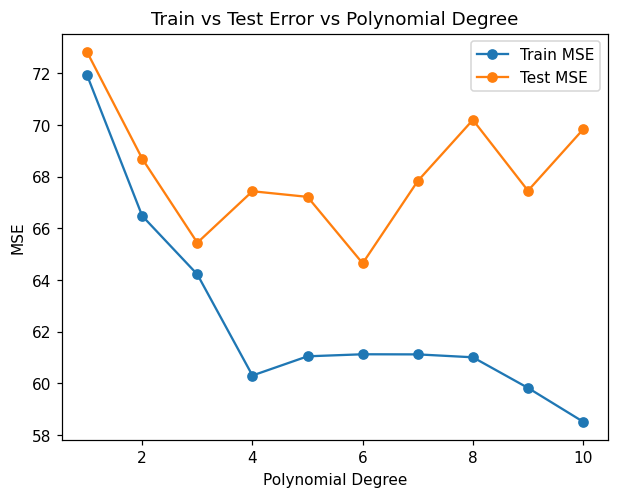

In [ ]:
# Cell 5 – Error Curves (Code)
# Plot training vs test error to visualize overfitting
print("=== Plotting Training vs Test Error Curves ===")

plt.figure(figsize=(10, 6))

# Plot both training and test MSE vs polynomial degree
plt.plot(df_res["degree"], df_res["train_mse"], 
         marker="o", linewidth=2, markersize=6, 
         label="Training MSE", color='blue')

plt.plot(df_res["degree"], df_res["test_mse"], 
         marker="o", linewidth=2, markersize=6,
         label="Test MSE", color='red')

# Formatting and labels
plt.title("Training vs Test Error vs Model Complexity", fontsize=14, fontweight='bold')
plt.xlabel("Polynomial Degree (Model Complexity)", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add annotations for key regions
plt.axvline(x=3, color='green', linestyle='--', alpha=0.7, 
           label='Optimal complexity region')
plt.text(3.2, plt.ylim()[1]*0.8, 'Optimal\nComplexity', 
         fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

print("Key observations:")
print("• Training error decreases monotonically (more complex = better fit)")
print("• Test error follows U-shape (bias-variance trade-off)")
print("• Gap between curves indicates overfitting")
print("• Optimal complexity minimizes test error")


### Plot 2 – Bias-Variance Decomposition
Test error ≈ **bias² + variance + noise** (irreducible noise not plotted).


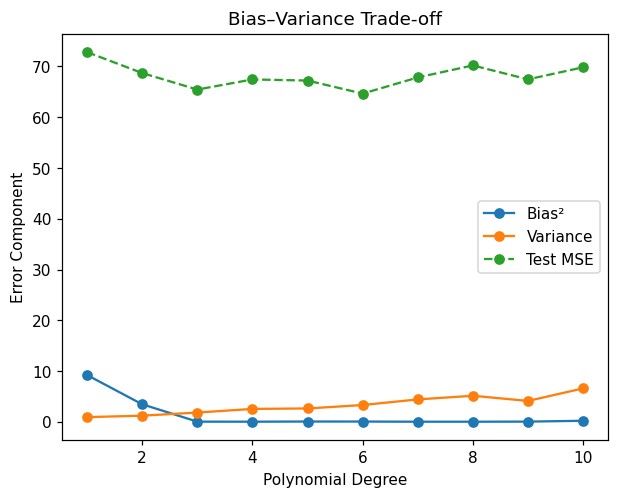

In [10]:
# Cell 6 – Bias-Variance Curves (Code)
plt.figure()
plt.plot(df_res["degree"], df_res["bias_sq"], marker="o", label="Bias²")
plt.plot(df_res["degree"], df_res["variance"], marker="o", label="Variance")
plt.plot(df_res["degree"], df_res["test_mse"], marker="o", linestyle="--", label="Test MSE")
plt.title("Bias–Variance Trade-off")
plt.xlabel("Polynomial Degree")
plt.ylabel("Error Component")
plt.legend()
plt.show()


### Interpretation
* **Low degree (1–2)**: High *bias²*, low variance → underfitting.  
* **Mid degree (~3–4)**: Balanced bias–variance, lowest test MSE.  
* **High degree (7+)**: Low bias but skyrocketing variance → overfitting.

Try adjusting **noise_std**, **n_datasets**, or using Ridge regularization to see how the curves change!
